dataset: (92,) (92,)
train: (92, 1) (92, 1)


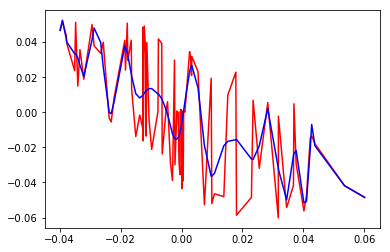

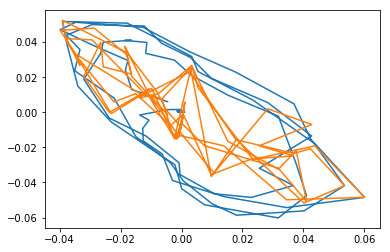

In [1]:
# http://scikit-learn.org/stable/auto_examples/gaussian_process/plot_gpr_noisy_targets.html
import numpy as np
from matplotlib import pyplot as plt

from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF, ConstantKernel as C

from sklearn import linear_model
reg = linear_model.Ridge (alpha = .5)

def file2mat(path):
    with open(path,'r') as src_file:
        lines = src_file.read().splitlines()
        for i in range(len(lines)):
            vec = [float(j) for j in lines[i].split(' ')[:-1]]
            lines[i] = vec
        mat = np.array(lines)
        return mat
    return 

def sort_x(x,y):
    L = sorted(zip(x,y))
    L = np.array(L)    
    return L[:,0], L[:,1]
    
def divide_data(x,y,num):
    selected_indices = np.unique(np.random.choice(x.shape[0],num,replace=False))
    x_train = x[selected_indices,:]
    y_train = y[selected_indices,:]
    
    print "test_size", x_train.shape, y_train.shape
    
    return x_train,y_train

x = file2mat('gp1/f_x_v.txt')
y = file2mat('gp1/f_y.txt')
x = x[:,0]
y = y[:,1]

# Sort the data and then plot
print 'dataset:',x.shape, y.shape
x_show, y_show = sort_x(x,y)
plt.plot(x_show,y_show,'r')

# train the Gaussian Process, get the predicted y, not in sorted order
x_train = np.atleast_2d(x).T
y_train = np.atleast_2d(y).T
print "train:", x_train.shape, y_train.shape

kernel = C(1.0, (1e-3, 1e3)) * RBF(10, (1e-2, 1e2))
gp = GaussianProcessRegressor(kernel=kernel, n_restarts_optimizer=10)#gp = GaussianProcessRegressor()
gp.fit(x_train, y_train)
y_pred = gp.predict(x_train)

# sort data and then plot
x_show, y_show = sort_x(x,y_pred)
plt.plot(x_show,y_show,'b')

plt.show()

plt.plot(x,y)
plt.plot(x_train,y_pred)
plt.show()

dataset: (92,) (92,)


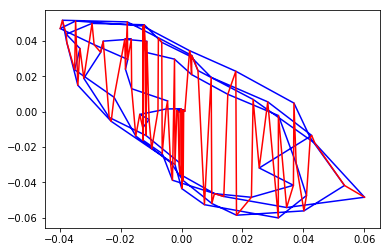

(89, 3, 1) (89, 1)


In [10]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

def create_dataset(x,y,seq_length):
    X = []
    Y = []
    for i in range(0,len(x)-seq_length, 1):
        seq_in = x[i:i+seq_length]
        seq_out = y[i+seq_length]
        X.append([seq_in])
        Y.append([seq_out])
        # print seq_in, '->', seq_out

    X = np.reshape(X,(len(X),seq_length,1))
    Y = np.reshape(Y,(len(Y),1))
    return X,Y
    
x = file2mat('gp1/f_x_v.txt')
y = file2mat('gp1/f_y.txt')
x = x[:,0]
y = y[:,1]
# normalization
# scaler = MinMaxScaler(feature_range=(-1, 1))
# x = scaler.fit_transform(x)
# y = scaler.fit_transform(y)


# Sort the data and then plot
print 'dataset:',x.shape, y.shape
x_order, y_order = sort_x(x,y)
plt.plot(x,y,'b')
plt.plot(x_order,y_order,'r')
plt.show()

# build dataset based on x,y
seq_length = 3
X, Y = create_dataset(x,y, seq_length)
print X.shape, Y.shape

Epoch 1/100
0s - loss: 0.0011
Epoch 2/100
0s - loss: 7.9151e-04
Epoch 3/100
0s - loss: 4.6124e-04
Epoch 4/100
0s - loss: 1.9551e-04
Epoch 5/100
0s - loss: 1.2654e-04
Epoch 6/100
0s - loss: 1.2274e-04
Epoch 7/100
0s - loss: 1.2175e-04
Epoch 8/100
0s - loss: 1.2110e-04
Epoch 9/100
0s - loss: 1.2058e-04
Epoch 10/100
0s - loss: 1.2012e-04
Epoch 11/100
0s - loss: 1.1967e-04
Epoch 12/100
0s - loss: 1.1925e-04
Epoch 13/100
0s - loss: 1.1884e-04
Epoch 14/100
0s - loss: 1.1843e-04
Epoch 15/100
0s - loss: 1.1804e-04
Epoch 16/100
0s - loss: 1.1766e-04
Epoch 17/100
0s - loss: 1.1729e-04
Epoch 18/100
0s - loss: 1.1693e-04
Epoch 19/100
0s - loss: 1.1659e-04
Epoch 20/100
0s - loss: 1.1626e-04
Epoch 21/100
0s - loss: 1.1593e-04
Epoch 22/100
0s - loss: 1.1561e-04
Epoch 23/100
0s - loss: 1.1531e-04
Epoch 24/100
0s - loss: 1.1502e-04
Epoch 25/100
0s - loss: 1.1473e-04
Epoch 26/100
0s - loss: 1.1445e-04
Epoch 27/100
0s - loss: 1.1417e-04
Epoch 28/100
0s - loss: 1.1389e-04
Epoch 29/100
0s - loss: 1.1362e-0

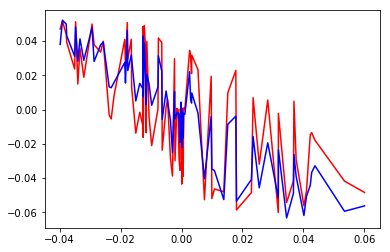

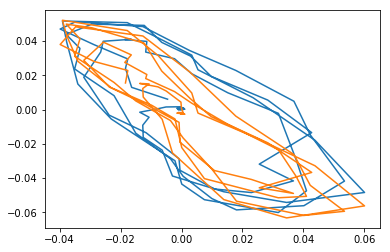

(92,) (89, 1)


In [11]:
import numpy as np
from keras.models import Sequential
from keras.layers import Dense, LSTM
from keras.utils import np_utils

model = Sequential()
model.add(LSTM(10, input_shape=(X.shape[1],X.shape[2])))
model.add(Dense(Y.shape[1]))
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(X,Y,epochs=100, batch_size=1, verbose=2, shuffle=False)


x_show, y_show = sort_x(x,y)
plt.plot(x_show,y_show,'r')

y_pred = model.predict(X)
x_pred = X[:,-1,:]
print x_pred.shape


x_show, y_pred_show = sort_x(x_pred,y_pred)
plt.plot(x_show,y_pred_show,'b')
plt.show()

plt.plot(x,y)
plt.plot(x_pred,y_pred)
plt.show()

Epoch 1/100
0s - loss: 0.0014
Epoch 2/100
0s - loss: 0.0011
Epoch 3/100
0s - loss: 8.6878e-04
Epoch 4/100
0s - loss: 5.7572e-04
Epoch 5/100
0s - loss: 2.6898e-04
Epoch 6/100
0s - loss: 1.3445e-04
Epoch 7/100
0s - loss: 1.1872e-04
Epoch 8/100
0s - loss: 1.1662e-04
Epoch 9/100
0s - loss: 1.1541e-04
Epoch 10/100
0s - loss: 1.1454e-04
Epoch 11/100
0s - loss: 1.1385e-04
Epoch 12/100
0s - loss: 1.1328e-04
Epoch 13/100
0s - loss: 1.1280e-04
Epoch 14/100
0s - loss: 1.1237e-04
Epoch 15/100
0s - loss: 1.1198e-04
Epoch 16/100
0s - loss: 1.1164e-04
Epoch 17/100
0s - loss: 1.1132e-04
Epoch 18/100
0s - loss: 1.1103e-04
Epoch 19/100
0s - loss: 1.1076e-04
Epoch 20/100
0s - loss: 1.1051e-04
Epoch 21/100
0s - loss: 1.1026e-04
Epoch 22/100
0s - loss: 1.1004e-04
Epoch 23/100
0s - loss: 1.0983e-04
Epoch 24/100
0s - loss: 1.0962e-04
Epoch 25/100
0s - loss: 1.0941e-04
Epoch 26/100
0s - loss: 1.0921e-04
Epoch 27/100
0s - loss: 1.0902e-04
Epoch 28/100
0s - loss: 1.0883e-04
Epoch 29/100
0s - loss: 1.0864e-04
Ep

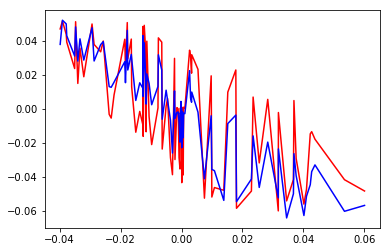

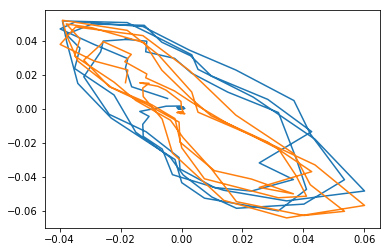

In [13]:
import numpy as np
from keras.models import Sequential
from keras.layers import Dense, LSTM
from keras.utils import np_utils

model = Sequential()
model.add(LSTM(10, input_shape=(X.shape[1],X.shape[2])))
model.add(Dense(Y.shape[1]))
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(X,Y,epochs=100, batch_size=1, verbose=2, shuffle=False)


x_show, y_show = sort_x(x,y)
plt.plot(x_show,y_show,'r')

y_pred = model.predict(X)
x_pred = X[:,-1,:]
print x_pred.shape


x_show, y_pred_show = sort_x(x_pred,y_pred)
plt.plot(x_show,y_pred_show,'b')
plt.show()

plt.plot(x,y)
plt.plot(x_pred,y_pred)
plt.show()

In [14]:
from keras.models import Sequential
from keras.layers import LSTM, Dense
import numpy as np

data_dim = 16
timesteps = 8
num_classes = 10
batch_size = 32

# Expected input batch shape: (batch_size, timesteps, data_dim)
# Note that we have to provide the full batch_input_shape since the network is stateful.
# the sample of index i in batch k is the follow-up for the sample i in batch k-1.
model = Sequential()
model.add(LSTM(32, return_sequences=True, stateful=True,
               batch_input_shape=(batch_size, timesteps, data_dim)))
model.add(LSTM(32, return_sequences=True, stateful=True))
model.add(LSTM(32, stateful=True))
model.add(Dense(10, activation='softmax'))

model.compile(loss='categorical_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

# Generate dummy training data
x_train = np.random.random((batch_size * 10, timesteps, data_dim))
y_train = np.random.random((batch_size * 10, num_classes))

# Generate dummy validation data
x_val = np.random.random((batch_size * 3, timesteps, data_dim))
y_val = np.random.random((batch_size * 3, num_classes))

model.fit(x_train, y_train,
          batch_size=batch_size, epochs=5, shuffle=False,
          validation_data=(x_val, y_val))


Train on 320 samples, validate on 96 samples
Epoch 1/5
320/320 [==============================] - 1s - loss: 11.5671 - acc: 0.1094 - val_loss: 11.3607 - val_acc: 0.0833
Epoch 2/5
320/320 [==============================] - 0s - loss: 11.5606 - acc: 0.1062 - val_loss: 11.3601 - val_acc: 0.0833
Epoch 3/5
320/320 [==============================] - 0s - loss: 11.5596 - acc: 0.1031 - val_loss: 11.3600 - val_acc: 0.0833
Epoch 4/5
320/320 [==============================] - 0s - loss: 11.5589 - acc: 0.1000 - val_loss: 11.3601 - val_acc: 0.0833
Epoch 5/5
320/320 [==============================] - 0s - loss: 11.5584 - acc: 0.0938 - val_loss: 11.3601 - val_acc: 0.0729
